<a href="https://colab.research.google.com/github/deniseiras/EscolaVeraoSantosDumont2023/blob/main/dl4sin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
input_dim = 4
torch.rand(1, input_dim)

tensor([[0.6653, 0.0772, 0.3671, 0.1653]])

# Funções

In [ ]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):

    # to track the training loss as the model trains
    train_losses = []
    # to track the validation loss as the model trains
    valid_losses = []
    # to track the average training loss per epoch as the model trains
    avg_train_losses = []
    # to track the average validation loss per epoch as the model trains
    avg_valid_losses = [] 
    
    optimizer = opt_func(model.parameters(), lr)

    for epoch in range(epochs):

        ###################
        # train the model #
        ###################
        model.train() # prep model for training
        for data, target in train_loader:
            # clear the gradients of all optimized variables
            model.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data.float())

            #print('Going to compute loss...')
            # calculate the loss
            loss = criterion(output, target.float())

            #print('Done computing loss.')

            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # record training loss
            train_losses.append(loss.item())

        ######################    
        # validate the model #
        ######################
        model.eval() # prep model for evaluation
        for data, target in val_loader:
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data.float())
            # calculate the loss
            loss = criterion(output, target.float())
            # record validation loss
            valid_losses.append(loss.item())

        # print training/validation statistics 
        # calculate average loss over an epoch
        train_loss = np.average(train_losses)
        valid_loss = np.average(valid_losses)
        avg_train_losses.append(train_loss)
        avg_valid_losses.append(valid_loss)
        
        epoch_len = len(str(n_epochs))
        
        print_msg = (f'[{epoch:>{epoch_len}}/{n_epochs:>{epoch_len}}] ' +
                     f'train_loss: {train_loss:.5f} ' +
                     f'valid_loss: {valid_loss:.5f}')
        
        print(print_msg)
        
        # clear lists to track next epoch
        train_losses = []
        valid_losses = []
  
    return  model, avg_train_losses, avg_valid_losses

A função `window_generator` definida abaixo implementa uma variante da técnica de janelas deslizantes. Essa função recebe dois argumentos:

- `sequence`: a série temporal a ser processada para obtenção dos exemplos de treinamento;
- `n_steps`: a quantidade de observações prévias a serem usadas como preditores.

In [ ]:
def window_generator(sequence, n_steps):
    x, y = list(), list()
    for i in range(len(sequence)):
        
        end_ix = i + n_steps
        
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y)

In [ ]:
"""
 Geração das séries sintéticas
"""
def generate_sin(look_back):
    n_features = 1

    print(train_series.shape)
    print(val_series.shape)
    print(test_series.shape)

    # Inspeção visual da série gerada
    fig, ax = plt.subplots(1, 1, figsize=(15, 4))
    ax.plot(train_steps, train_series, lw=3, label='train data')
    ax.plot(val_steps, val_series, lw=3, label='val data')
    ax.plot(test_steps, test_series,  lw=3, label='test data')
    ax.legend(loc="lower left")
    plt.show();
    fig.savefig('sin.png', bbox_inches='tight')

    # Janelamento (data windowing)
    look_back = 4
    X_train, y_train =  window_generator(train_series, look_back)
    X_val, y_val =  window_generator(val_series, look_back)
    X_test, y_test =  window_generator(test_series, look_back)

    print(X_train.shape)
    print(X_train[:, 0].shape)
    print(y_train.shape)

    print(X_val.shape)
    print(y_val.shape)

    print(X_test.shape)
    print(y_test.shape)
  
    df_train = pd.DataFrame({'t0': X_train[:,0], 
                             't1': X_train[:,1], 
                             't2': X_train[:,2], 
                             't3': X_train[:,3], 
                             'y': y_train})
    df_train.to_csv('train_sin.csv', index=False)

    df_val = pd.DataFrame({'t0': X_val[:,0], 
                           't1': X_val[:,1], 
                           't2': X_val[:,2], 
                           't3': X_val[:,3], 
                           'y': y_val})
    df_val.to_csv('val_sin.csv', index=False)
    
    df_test = pd.DataFrame({'t0': X_test[:,0], 
                            't1': X_test[:,1], 
                            't2': X_test[:,2], 
                            't3': X_test[:,3], 
                            'y': y_test})
    df_test.to_csv('test_sin.csv', index=False)

(200,)
(100,)
(100,)


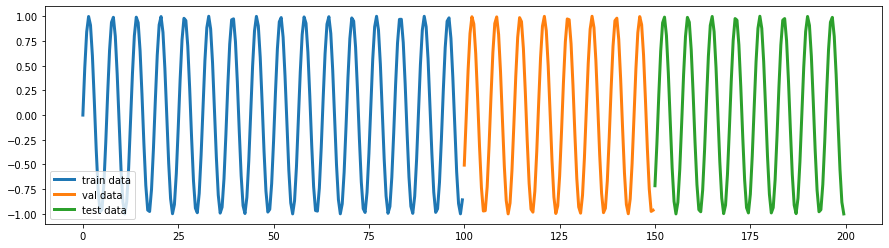

(196, 4)
(196,)
(196,)
(96, 4)
(96,)
(96, 4)
(96,)


In [ ]:
train_steps = np.arange(0, 100, 0.5)
train_series = np.sin(train_steps)

val_steps = np.arange(100, 150, 0.5)
val_series = np.sin(val_steps)

test_steps = np.arange(150, 200, 0.5)
test_series = np.sin(test_steps)

look_back = 4

generate_sin(look_back)

# Geração da série sintética

In [ ]:
df_train = pd.read_csv('train_sin.csv')
df_val = pd.read_csv('val_sin.csv')
df_test = pd.read_csv('test_sin.csv')

print(df_train.shape)

X_train = df_train.drop('y', axis=1).to_numpy()
X_val = df_val.drop('y', axis=1).to_numpy()
X_test = df_test.drop('y', axis=1).to_numpy()

y_train = df_train.y.to_numpy()
y_val = df_val.y.to_numpy()
y_test = df_test.y.to_numpy()

X_train = X_train[:, :, np.newaxis]
y_train = y_train[:, np.newaxis]

X_val = X_val[:, :, np.newaxis]
y_val = y_val[:, np.newaxis]

X_test = X_test[:, :, np.newaxis]
y_test = y_test[:, np.newaxis]

train_x = torch.from_numpy(X_train)
train_y = torch.from_numpy(y_train)

valid_x = torch.from_numpy(X_val)
valid_y = torch.from_numpy(y_val)

test_x = torch.from_numpy(X_test)
test_y = torch.from_numpy(y_test)

print(train_x.shape)
print(valid_x.shape)
print(test_x.shape)

(196, 5)
torch.Size([196, 4, 1])
torch.Size([96, 4, 1])
torch.Size([96, 4, 1])


In [ ]:
df_train.head()

,t0,t1,t2,t3,y
0,0.000000,0.479426,0.841471,0.997495,0.909297
1,0.479426,0.841471,0.997495,0.909297,0.598472
2,0.841471,0.997495,0.909297,0.598472,0.141120
3,0.997495,0.909297,0.598472,0.141120,-0.350783
4,0.909297,0.598472,0.141120,-0.350783,-0.756802


In [ ]:
train_x[0:3]

tensor([[[0.0000],
         [0.4794],
         [0.8415],
         [0.9975]],

        [[0.4794],
         [0.8415],
         [0.9975],
         [0.9093]],

        [[0.8415],
         [0.9975],
         [0.9093],
         [0.5985]]], dtype=torch.float64)

In [ ]:
y_train[0:3]

array([[0.90929743],
       [0.59847214],
       [0.14112001]])

# MLP

## Preparação dos tensores

Objetos `TensorDataset` e `Dataloader` para os conjuntos de treino, validação e teste.

In [ ]:
from torch.utils.data import TensorDataset

train_x = train_x.squeeze()
valid_x = valid_x.squeeze()
test_x = test_x.squeeze()

train_ds = TensorDataset(train_x, train_y)
valid_ds = TensorDataset(valid_x, valid_y)
test_ds = TensorDataset(test_x, test_y)

BATCH_SIZE = 8
train_loader = torch.utils.data.DataLoader(train_ds, batch_size = BATCH_SIZE, shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_ds, batch_size = BATCH_SIZE, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_ds, batch_size = BATCH_SIZE, shuffle = True)

In [ ]:
train_ds = TensorDataset(train_x, train_y)
train_ds[0:3]

(tensor([[0.0000, 0.4794, 0.8415, 0.9975],
         [0.4794, 0.8415, 0.9975, 0.9093],
         [0.8415, 0.9975, 0.9093, 0.5985]], dtype=torch.float64),
 tensor([[0.9093],
         [0.5985],
         [0.1411]], dtype=torch.float64))

In [ ]:
for xb, yb in train_loader:
    print(xb)
    print(yb)
    print(xb.shape)
    print(yb.shape)
    break

tensor([[ 0.0000,  0.4794,  0.8415,  0.9975],
        [ 0.4794,  0.8415,  0.9975,  0.9093],
        [ 0.8415,  0.9975,  0.9093,  0.5985],
        [ 0.9975,  0.9093,  0.5985,  0.1411],
        [ 0.9093,  0.5985,  0.1411, -0.3508],
        [ 0.5985,  0.1411, -0.3508, -0.7568],
        [ 0.1411, -0.3508, -0.7568, -0.9775],
        [-0.3508, -0.7568, -0.9775, -0.9589]], dtype=torch.float64)
tensor([[ 0.9093],
        [ 0.5985],
        [ 0.1411],
        [-0.3508],
        [-0.7568],
        [-0.9775],
        [-0.9589],
        [-0.7055]], dtype=torch.float64)
torch.Size([8, 4])
torch.Size([8, 1])


## Definição da rede neural

In [ ]:
import torch.nn.functional as F

class MLPNet(nn.Module):
    def __init__(self, in_size, hidden_size, out_size):
        super(MLPNet,self).__init__()
        # hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)
        # output layer
        self.linear2 = nn.Linear(hidden_size, out_size)
        
    def forward(self, xb):
        # Get intermediate outputs using hidden layer
        out = self.linear1(xb)

        # Apply activation function
        out = F.relu(out)

        # Get predictions using output layer
        out = self.linear2(out)

        return out        


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MLPNet(in_size=4, hidden_size=50, out_size=1)
print(model)

MLPNet(
  (linear1): Linear(in_features=4, out_features=50, bias=True)
  (linear2): Linear(in_features=50, out_features=1, bias=True)
)


In [ ]:
criterion = nn.MSELoss()

Erro médio cometido pelo modelo (ainda não treinado) sobre o conjunto de teste:

In [ ]:
test_losses = []
for xb, yb in test_loader:
  output = model(xb.float())
  loss = criterion(output, yb.float())
  test_losses.append(loss.item())
test_loss = np.average(test_losses)
print(test_loss)

0.6915060306588808


## Ajuste do modelo

In [ ]:
for t in model.parameters():
    print(t.shape)

torch.Size([50, 4])
torch.Size([50])
torch.Size([1, 50])
torch.Size([1])


In [ ]:
n_epochs = 1000
model = model.float()
model, train_loss, valid_loss = fit(n_epochs, 
                                    1e-5, model, 
                                    train_loader, 
                                    valid_loader, 
                                    opt_func=torch.optim.Adam)

[   0/1000] train_loss: 0.67718 valid_loss: 0.68449
[   1/1000] train_loss: 0.67505 valid_loss: 0.68236
[   2/1000] train_loss: 0.67295 valid_loss: 0.68024
[   3/1000] train_loss: 0.67086 valid_loss: 0.67812
[   4/1000] train_loss: 0.66877 valid_loss: 0.67602
[   5/1000] train_loss: 0.66670 valid_loss: 0.67392
[   6/1000] train_loss: 0.66463 valid_loss: 0.67183
[   7/1000] train_loss: 0.66257 valid_loss: 0.66975
[   8/1000] train_loss: 0.66051 valid_loss: 0.66767
[   9/1000] train_loss: 0.65847 valid_loss: 0.66560
[  10/1000] train_loss: 0.65642 valid_loss: 0.66353
[  11/1000] train_loss: 0.65439 valid_loss: 0.66148
[  12/1000] train_loss: 0.65236 valid_loss: 0.65942
[  13/1000] train_loss: 0.65034 valid_loss: 0.65738
[  14/1000] train_loss: 0.64832 valid_loss: 0.65534
[  15/1000] train_loss: 0.64630 valid_loss: 0.65330
[  16/1000] train_loss: 0.64430 valid_loss: 0.65127
[  17/1000] train_loss: 0.64230 valid_loss: 0.64925
[  18/1000] train_loss: 0.64030 valid_loss: 0.64723
[  19/1000] 

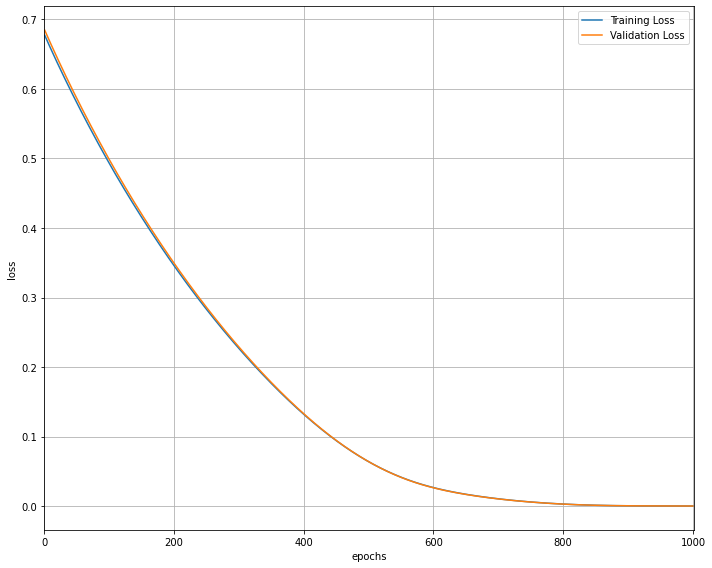

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,len(train_loss)+1),train_loss, label='Training Loss')
plt.plot(range(1,len(valid_loss)+1),valid_loss,label='Validation Loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.xlim(0, len(train_loss)+1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('loss_plot.png', bbox_inches='tight')

## Inferência (predição)

Inferência sobre um único exemplo:

In [ ]:
xb[0]

tensor([-0.7024, -0.2751,  0.2195,  0.6603], dtype=torch.float64)

In [ ]:
model(xb[0].float())

tensor([0.9343], grad_fn=<AddBackward0>)

In [ ]:
example = np.array([-0.7024, -0.2751,  0.2195,  0.6603])
example = torch.from_numpy(example)
print(example)
model(example.float())

tensor([-0.7024, -0.2751,  0.2195,  0.6603], dtype=torch.float64)


tensor([0.9343], grad_fn=<AddBackward0>)

Inferência sobre todos os exemplos do conjunto de teste:

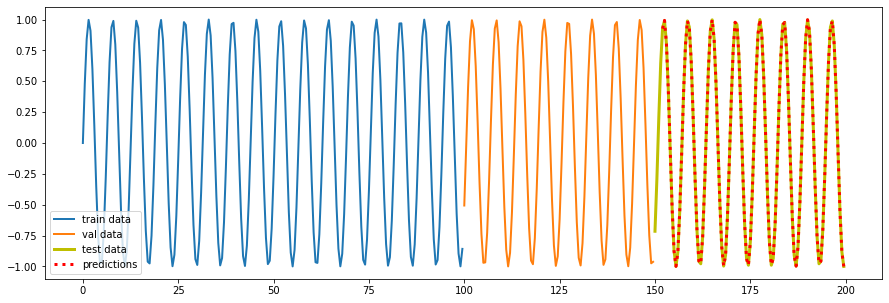

In [ ]:
test_losses = []
outputs = []
with torch.no_grad():
  for xb, yb in test_loader:
    output = model(xb.float())
    outputs.append(output)
test_predictions = torch.vstack(outputs).squeeze(1)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(train_steps, train_series, lw=2, label='train data')
ax.plot(val_steps, val_series, lw=2, label='val data')
ax.plot(test_steps, test_series, lw=3, c='y', label='test data')
ax.plot(test_steps[look_back:], test_predictions, lw=3, c='r',linestyle = ':', label='predictions')
ax.legend(loc="lower left")
plt.show()

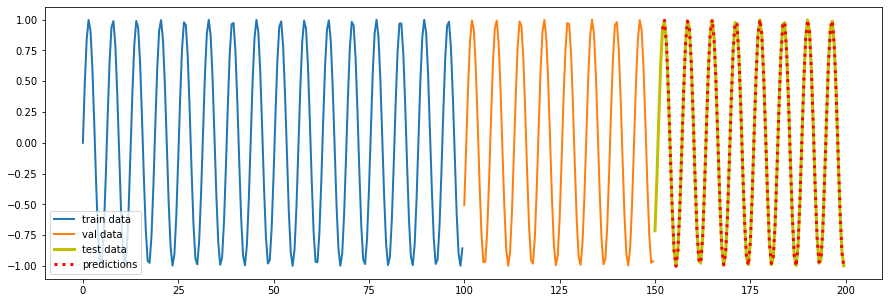

# Conv1D

### Preparação dos tensores

O PyTorch espera que cada tensor usado no treinamento tenha a forma `[batch, channels_in, time]`. Em particular, a dimensão das features `channels_in` deve ser a central nos tensores. Sendo assim, o código abaixo usa a função `permute` para pivotear (reposicionar) a ordem das dimensões dentro de cada tensor: as posições das dimensões originais 0, 1 e 2 são trocadas para as posições 0, 2 e 1.

In [ ]:
train_x = torch.permute(train_x, (0, 2, 1))
valid_x = torch.permute(valid_x, (0, 2, 1))
test_x = torch.permute(test_x, (0, 2, 1))

print(train_x.shape)
print(valid_x.shape)
print(test_x.shape)

torch.Size([196, 1, 4])
torch.Size([96, 1, 4])
torch.Size([96, 1, 4])


Objetos `TensorDataset` e `Dataloader` para os conjuntos de treino, validação e teste.

In [ ]:
from torch.utils.data import TensorDataset

train_ds = TensorDataset(train_x, train_y)
valid_ds = TensorDataset(valid_x, valid_y)
test_ds = TensorDataset(test_x, test_y)

BATCH_SIZE = 8
train_loader = torch.utils.data.DataLoader(train_ds, batch_size = BATCH_SIZE, shuffle = False)
valid_loader = torch.utils.data.DataLoader(valid_ds, batch_size = BATCH_SIZE, shuffle = False)
test_loader = torch.utils.data.DataLoader(test_ds, batch_size = BATCH_SIZE, shuffle = False)

In [ ]:
train_ds = TensorDataset(train_x, train_y)
train_ds[0:5]

In [ ]:
for xb, yb in train_loader:
    print(xb)
    print(yb)
    break

tensor([[[ 0.0000,  0.4794,  0.8415,  0.9975]],

        [[ 0.4794,  0.8415,  0.9975,  0.9093]],

        [[ 0.8415,  0.9975,  0.9093,  0.5985]],

        [[ 0.9975,  0.9093,  0.5985,  0.1411]],

        [[ 0.9093,  0.5985,  0.1411, -0.3508]],

        [[ 0.5985,  0.1411, -0.3508, -0.7568]],

        [[ 0.1411, -0.3508, -0.7568, -0.9775]],

        [[-0.3508, -0.7568, -0.9775, -0.9589]]], dtype=torch.float64)
tensor([[ 0.9093],
        [ 0.5985],
        [ 0.1411],
        [-0.3508],
        [-0.7568],
        [-0.9775],
        [-0.9589],
        [-0.7055]], dtype=torch.float64)


## Definição da rede neural

In [ ]:
class Conv1DNet(nn.Module):
    def __init__(self, in_channels):
        super(Conv1DNet,self).__init__()
        self.conv1d = nn.Conv1d(in_channels = in_channels, out_channels = 64, kernel_size = 2)
        self.relu = nn.ReLU()#inplace = True)
        self.fc1 = nn.Linear(192,50)
        self.fc2 = nn.Linear(50,1)

    def forward(self,x):
        #print('Input: ', x.shape)
        x = self.conv1d(x)
        #print('After conv1: ', x.shape)
        x = self.relu(x)
        #print('After ReLU: ', x.shape)
        #x = x.view(x.shape[0], -1)
        x = nn.Flatten(1, -1)(x)
        #print('After view (flatenning): ', x.shape)
        x = self.fc1(x)
        #print('After fc1: ', x.shape)
        x = self.relu(x)
        x = self.fc2(x)
        #print('return')
        #print(x.shape)
        return x

A cada passo de tempo consideramos apenas um valor: `in_channels = 1`.

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = Conv1DNet(in_channels=1).to(device)

In [ ]:
print(model)

In [ ]:
criterion = nn.MSELoss()

In [ ]:
for xb, yb in train_loader:
  print(xb.shape)
  print(yb.shape)
  break

torch.Size([8, 1, 4])
torch.Size([8, 1])


Erro médio cometido pelo modelo (ainda não treinado) sobre o conjunto de teste:

In [ ]:
test_losses = []
for xb, yb in test_loader:
  output = model(xb.float())
  loss = criterion(output, yb.float())
  test_losses.append(loss.item())
test_loss = np.average(test_losses)
print(test_loss)

0.5421097377936045


## Ajuste do modelo

In [ ]:
n_epochs = 300
model = model.float()
model, train_loss, valid_loss = fit(n_epochs, 1e-5, model, train_loader, valid_loader, opt_func=torch.optim.Adam)

[  0/300] train_loss: 0.53285 valid_loss: 0.53229
[  1/300] train_loss: 0.52460 valid_loss: 0.52419
[  2/300] train_loss: 0.51668 valid_loss: 0.51629
[  3/300] train_loss: 0.50892 valid_loss: 0.50847
[  4/300] train_loss: 0.50121 valid_loss: 0.50067
[  5/300] train_loss: 0.49352 valid_loss: 0.49287
[  6/300] train_loss: 0.48585 valid_loss: 0.48510
[  7/300] train_loss: 0.47817 valid_loss: 0.47732
[  8/300] train_loss: 0.47049 valid_loss: 0.46955
[  9/300] train_loss: 0.46282 valid_loss: 0.46176
[ 10/300] train_loss: 0.45516 valid_loss: 0.45398
[ 11/300] train_loss: 0.44751 valid_loss: 0.44622
[ 12/300] train_loss: 0.43988 valid_loss: 0.43845
[ 13/300] train_loss: 0.43221 valid_loss: 0.43064
[ 14/300] train_loss: 0.42452 valid_loss: 0.42283
[ 15/300] train_loss: 0.41687 valid_loss: 0.41509
[ 16/300] train_loss: 0.40930 valid_loss: 0.40743
[ 17/300] train_loss: 0.40173 valid_loss: 0.39976
[ 18/300] train_loss: 0.39417 valid_loss: 0.39209
[ 19/300] train_loss: 0.38660 valid_loss: 0.38440


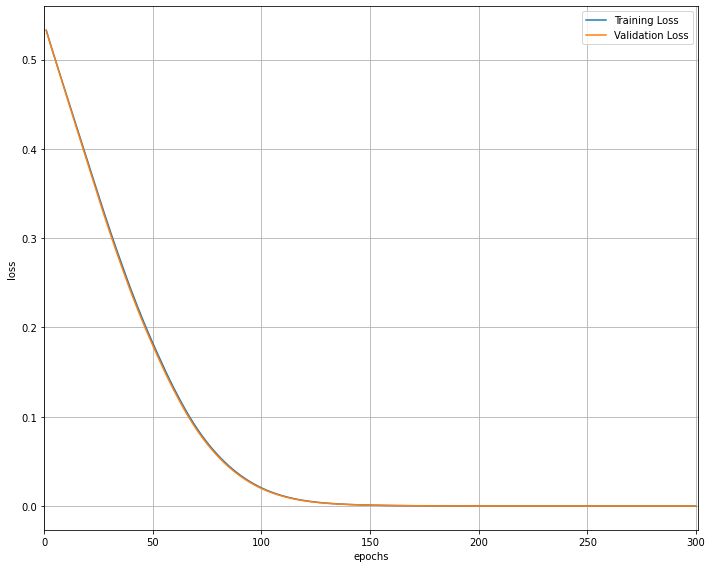

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,len(train_loss)+1),train_loss, label='Training Loss')
plt.plot(range(1,len(valid_loss)+1),valid_loss,label='Validation Loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.xlim(0, len(train_loss)+1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('loss_plot.png', bbox_inches='tight')

In [ ]:
test_losses = []
for xb, yb in test_loader:
  output = model(xb.float())
  # calculate the loss
  loss = criterion(output, yb.float())
  # record validation loss
  test_losses.append(loss.item())
test_loss = np.average(test_losses)
print(test_loss)

1.878384758432124e-05


## Inferência (predição)

In [ ]:
test_losses = []
outputs = []
with torch.no_grad():
  for xb, yb in test_loader:
    output = model(xb.float())
    outputs.append(output)
test_predictions = torch.vstack(outputs).squeeze(1)

In [ ]:
test_predictions.numpy()

array([ 9.3599945e-01,  9.8783022e-01,  8.0408913e-01,  4.2385870e-01,
       -6.4854428e-02, -5.3606367e-01, -8.6840445e-01, -9.9842674e-01,
       -8.8534433e-01, -5.4133296e-01, -7.9956867e-02,  4.0288585e-01,
        7.9284692e-01,  9.9087650e-01,  9.3803972e-01,  6.6234297e-01,
        2.2234191e-01, -2.7448618e-01, -7.0226014e-01, -9.5928115e-01,
       -9.8133737e-01, -7.5585890e-01, -3.5155046e-01,  1.2588568e-01,
        6.0494882e-01,  9.0549952e-01,  9.9650007e-01,  8.4174246e-01,
        4.8195487e-01,  2.1417588e-03, -4.7798347e-01, -8.3314937e-01,
       -9.9495888e-01, -9.1751224e-01, -5.9609723e-01, -1.4493281e-01,
        3.3842176e-01,  7.5754946e-01,  9.7874933e-01,  9.5945281e-01,
        7.1188647e-01,  2.8716612e-01, -2.1022975e-01, -6.5593404e-01,
       -9.4053334e-01, -9.9069041e-01, -7.9893458e-01, -4.1196859e-01,
        6.2903181e-02,  5.4509330e-01,  8.7169278e-01,  1.0017244e+00,
        8.7557417e-01,  5.3931469e-01,  7.0836723e-02, -4.1833538e-01,
      

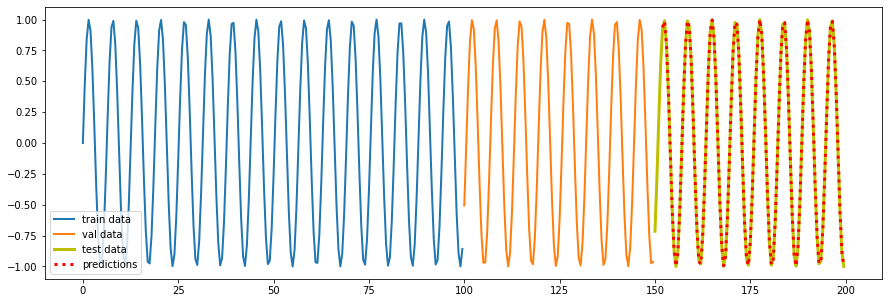

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(train_steps, train_series, lw=2, label='train data')
ax.plot(val_steps, val_series, lw=2, label='val data')
ax.plot(test_steps, test_series, lw=3, c='y', label='test data')
ax.plot(test_steps[look_back:], test_predictions, lw=3, c='r',linestyle = ':', label='predictions')
ax.legend(loc="lower left")
plt.show();

Salva predições em arquivo

# LSTM

### Preparação dos tensores

In [ ]:
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)

X_val = torch.from_numpy(X_val)
y_val = torch.from_numpy(y_val)

X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test)

In [ ]:
y_train.shape

In [ ]:
train_x = torch.permute(X_train, (2, 0, 1))
train_labels = torch.permute(y_train, (1, 0))
train_labels = train_labels[:, :, None]

val_x = torch.permute(X_val, (2, 0, 1))
val_labels = torch.permute(y_val, (1, 0))
val_labels = val_labels[:, :, None]

test_x = torch.permute(X_test, (2, 0, 1))
test_labels = torch.permute(y_test, (1, 0))
test_labels = test_labels[:, :, None]

print(train_x.shape)
print(train_labels.shape)
print(val_x.shape)
print(val_labels.shape)
print(test_x.shape)
print(test_labels.shape)

Objetos `TensorDataset` e `Dataloader` para os conjuntos de treino, validação e teste.

In [ ]:
from torch.utils.data import TensorDataset

train_ds = TensorDataset(train_x, train_labels)
val_ds = TensorDataset(val_x, val_labels)
test_ds = TensorDataset(test_x, test_labels)

BATCH_SIZE = 64
train_loader = torch.utils.data.DataLoader(train_ds, batch_size = BATCH_SIZE, shuffle = False)
val_loader = torch.utils.data.DataLoader(val_ds, batch_size = BATCH_SIZE, shuffle = False)
test_loader = torch.utils.data.DataLoader(test_ds, batch_size = BATCH_SIZE, shuffle = False)

## Definição da rede neural

In [ ]:
class LSTMNet(nn.Module):
    def __init__(self, n_neurons, input_shape):
        super(LSTMNet, self).__init__()
        self.lstm = nn.LSTM(input_size=input_shape, hidden_size=n_neurons)
        self.fc = nn.Linear(n_neurons, 1)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out)
        return out

## Ajuste do modelo

In [ ]:
n_neurons = 4
criterion = nn.MSELoss()
n_epochs = 1000
lr = 0.001

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.float()
model = LSTMNet(n_neurons, look_back).to(device)

print(model)

optimizer = torch.optim.Adam
model, train_loss, valid_loss = fit(n_epochs, lr, model, train_loader, val_loader, opt_func=optimizer)

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,len(train_loss)+1),train_loss, label='Training Loss')
plt.plot(range(1,len(valid_loss)+1),valid_loss,label='Validation Loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.xlim(0, len(train_loss)+1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('loss_plot.png', bbox_inches='tight')

## Inferência (predição)

In [ ]:
test_losses = []
outputs = []
with torch.no_grad():
  for xb, yb in test_loader:
    output = model(xb.float())
    outputs.append(output)
test_predictions = torch.vstack(outputs)
print(test_predictions.shape)
test_predictions = test_predictions.squeeze(0)
test_predictions = test_predictions.squeeze(1)
print(test_predictions.shape)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(train_steps,train_series, lw=2, label='train data')
ax.plot(val_steps,val_series, lw=2, label='val data')
ax.plot(test_steps,test_series, lw=3, c='y', label='test data')
ax.plot(test_steps[look_back:],test_predictions, lw=3, c='r',linestyle = ':', label='predictions')
ax.legend(loc="lower left")
plt.show();